In [41]:
from google.cloud import bigquery
import pandas as pd

In [42]:
client = bigquery.Client()

In [43]:
dataset_ref = client.dataset("openaq", project = "bigquery-public-data")

In [44]:
dataset = client.get_dataset(dataset_ref)

In [45]:
tables = list(client.list_tables(dataset))

In [46]:
for table in tables:
    print (table.table_id)

global_air_quality


In [47]:
table_ref = dataset_ref.table("global_air_quality")
table = client.get_table(table_ref)

In [48]:
table.schema

[SchemaField('location', 'STRING', 'NULLABLE', 'Location where data was measured', ()),
 SchemaField('city', 'STRING', 'NULLABLE', 'City containing location', ()),
 SchemaField('country', 'STRING', 'NULLABLE', 'Country containing measurement in 2 letter ISO code', ()),
 SchemaField('pollutant', 'STRING', 'NULLABLE', 'Name of the Pollutant being measured. Allowed values: PM25, PM10, SO2, NO2, O3, CO, BC', ()),
 SchemaField('value', 'FLOAT', 'NULLABLE', 'Latest measured value for the pollutant', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'The datetime at which the pollutant was measured, in ISO 8601 format', ()),
 SchemaField('unit', 'STRING', 'NULLABLE', 'The unit the value was measured in coded by UCUM Code', ()),
 SchemaField('source_name', 'STRING', 'NULLABLE', 'Name of the source of the data', ()),
 SchemaField('latitude', 'FLOAT', 'NULLABLE', 'Latitude in decimal degrees. Precision >3 decimal points.', ()),
 SchemaField('longitude', 'FLOAT', 'NULLABLE', 'Longitude in d

In [49]:
client.list_rows(table, max_results = 5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


### Pollutants that are measured in Bosnia and Herzegovina

In [50]:
query_job = client.query("""
    SELECT DISTINCT pollutant
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = 'BA' AND CAST(timestamp as date) = CAST("2020-01-16" as date)
    """)

In [51]:
results = query_job.result()

In [52]:
results.to_dataframe()

,pollutant
0,pm25
1,co
2,no2
3,so2
4,o3


### I assumed that all those location are divided in some regions

In [53]:
query_job = client.query("""
    SELECT DISTINCT source_name
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = "BA" 
    """)

In [54]:
results = query_job.result()

In [55]:
results.to_dataframe()

,source_name
0,Bosnia
1,Bosnia2
2,Sarajevo
3,Bosnia_Tuzlanski


### Let's see all those locations for every region

In [56]:
query_job = client.query("""
    SELECT DISTINCT location
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = "BA" AND source_name = "Bosnia_Tuzlanski"
    """)

In [57]:
results = query_job.result()

In [58]:
tuzla = results.to_dataframe()

In [59]:
tuzla.columns = ["Bosnia_Tuzlanski"]
tuzla

,Bosnia_Tuzlanski
0,Živinice
1,Bukinje
2,BKC
3,Lukavac
4,Skver


In [60]:
query_job = client.query("""
    SELECT DISTINCT location
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = "BA" AND source_name = "Bosnia"
    """)

In [61]:
results = query_job.result()

In [62]:
result = results.to_dataframe()

In [63]:
result.columns = ["Bosnia"]
result

,Bosnia
0,Rasadnik
1,Ivan Sedlo
2,mobilna (Ilidža)
3,Otoka
4,Vijećnica
5,Brist
6,Harmani


In [64]:
query_job = client.query("""
    SELECT DISTINCT location
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = "BA" AND source_name = "Bosnia2"
    """)

In [65]:
results = query_job.result()

In [66]:
result = results.to_dataframe()

In [67]:
result.columns = ["Bosnia2"]
result

,Bosnia2
0,Rasadnik
1,IvanSedlo
2,Ilidža
3,Otoka
4,Vijećnica
5,Bjelave
6,Ilijaš
7,Doboj
8,Radakovo
9,Brist


##### Bosnia2 contains the same locations as Bosnia except that Bosnia has mobilna(ilidza). So, I am going to analyze all those locations from Bosnia2 and just one from Bosnia (mobilna Ilidza).

After analysis below you can see that source_names "Bosnia" and "Bosnia2" do not measure data now. 
All those data in the dataset was from previous years(2018, 2019). So I am going to ignore those values, as I want to plot the newest data. 

In [68]:
query_job = client.query("""
    SELECT *
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE source_name = "Bosnia2"
""")

In [69]:
results = query_job.result()
result = results.to_dataframe()
result

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Centar,MK005A,MK,co,1409.0,2018-10-13 21:00:00+00:00,µg/m³,Bosnia2,41.992,21.423,1.0
1,Centar,MK005A,MK,no2,30.0,2018-10-13 21:00:00+00:00,µg/m³,Bosnia2,41.992,21.423,1.0
2,Centar,MK005A,MK,o3,14.0,2018-10-13 21:00:00+00:00,µg/m³,Bosnia2,41.992,21.423,1.0
3,Centar,MK005A,MK,so2,27.0,2018-10-13 21:00:00+00:00,µg/m³,Bosnia2,41.992,21.423,1.0
4,Rasadnik,Goražde,BA,co,141.0,2018-09-08 07:00:00+00:00,µg/m³,Bosnia2,43.661,18.977,1.0
5,Rasadnik,Goražde,BA,o3,8.0,2018-08-15 02:00:00+00:00,µg/m³,Bosnia2,43.661,18.977,1.0
6,Rasadnik,Goražde,BA,so2,10.0,2018-09-08 07:00:00+00:00,µg/m³,Bosnia2,43.661,18.977,1.0
7,IvanSedlo,Sarajevo,BA,o3,50.0,2018-10-13 21:00:00+00:00,µg/m³,Bosnia2,43.715,18.036,1.0
8,IvanSedlo,Sarajevo,BA,pm10,86.0,2018-10-01 07:00:00+00:00,µg/m³,Bosnia2,43.715,18.036,1.0
9,IvanSedlo,Sarajevo,BA,so2,13.0,2018-10-13 21:00:00+00:00,µg/m³,Bosnia2,43.715,18.036,1.0


In [70]:
query_job = client.query("""
    SELECT *
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE source_name = "Bosnia"
""")

In [71]:
results = query_job.result()
result = results.to_dataframe()
result

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Rasadnik,Goražde,BA,no2,19.0,2018-03-22 23:00:00+00:00,µg/m³,Bosnia,43.661,18.977,1.0
1,Rasadnik,Goražde,BA,pm10,2.0,2018-03-14 14:00:00+00:00,µg/m³,Bosnia,43.661,18.977,1.0
2,Ivan Sedlo,Sarajevo,BA,co,566.0,2016-11-27 11:00:00+00:00,µg/m³,Bosnia,43.715,18.036,1.0
3,Ivan Sedlo,Sarajevo,BA,no2,0.0,2016-06-06 09:30:00+00:00,µg/m³,Bosnia,43.715,18.036,1.0
4,mobilna (Ilidža),Sarajevo,BA,co,316.0,2016-11-27 11:00:00+00:00,µg/m³,Bosnia,43.830,18.311,1.0
5,Otoka,Sarajevo,BA,co,267.0,2016-11-27 11:00:00+00:00,µg/m³,Bosnia,43.848,18.364,1.0
6,Vijećnica,Sarajevo,BA,o3,19.0,2017-02-13 13:00:00+00:00,µg/m³,Bosnia,43.859,18.435,1.0
7,Brist,Zenica,BA,co,0.0,2016-06-30 06:00:00+00:00,µg/m³,Bosnia,44.202,17.800,1.0
8,Brist,Zenica,BA,no2,22.0,2017-10-25 21:00:00+00:00,µg/m³,Bosnia,44.202,17.800,1.0
9,Harmani,Jajce,BA,co,1508.0,2016-11-27 11:00:00+00:00,µg/m³,Bosnia,44.343,17.268,1.0


### At what time do sensors send data?

In [72]:
query_job = client.query("""
    SELECT DISTINCT timestamp
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE source_name = "Bosnia_Tuzlanski" AND CAST(timestamp as date) = CAST("2020-01-16" as date)
""")

In [73]:
results = query_job.result()

In [74]:
results.to_dataframe()

,timestamp
0,2020-01-16 18:00:00+00:00
1,2020-01-16 17:00:00+00:00
2,2020-01-16 16:00:00+00:00


After some further analysis I realized that I can obtain just the last two measurements, all other is deleted.

### Let's get data from this day

In [75]:
query_job = client.query("""
    SELECT *
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE source_name = "Bosnia_Tuzlanski" AND CAST(timestamp as date) = CAST("2020-01-16" as date)
    """)

In [76]:
results = query_job.result()
result = results.to_dataframe()

In [77]:
result

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Živinice,Živinice,BA,co,4969.0,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.453888,18.648333,1.0
1,Živinice,Živinice,BA,no2,58.6,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.453888,18.648333,1.0
2,Živinice,Živinice,BA,so2,316.9,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.453888,18.648333,1.0
3,Bukinje,Tuzla,BA,co,1502.0,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
4,Bukinje,Tuzla,BA,o3,21.9,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
5,Bukinje,Tuzla,BA,pm25,51.7,2020-01-16 17:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
6,Bukinje,Tuzla,BA,so2,48.8,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
7,BKC,Tuzla,BA,co,6914.0,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.531944,18.654722,1.0
8,BKC,Tuzla,BA,no2,42.2,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.531944,18.654722,1.0
9,BKC,Tuzla,BA,o3,6.0,2020-01-16 16:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.531944,18.654722,1.0


In [96]:
query_job = client.query("""
    SELECT location, value
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE source_name = "Bosnia_Tuzlanski" AND CAST(timestamp as date) = CAST("2020-01-16" as date) AND pollutant = "pm25"
    ORDER BY value DESC
    """)

In [97]:
pm25 = query_job.result()
df_pm25 = pm25.to_dataframe()

In [98]:
df_pm25

,location,value
0,Skver,227.7
1,Lukavac,140.9
2,Bukinje,51.7


In [78]:
import pandas as pd

result.to_csv("AirQuality.csv", index = False)

In [105]:
df = pd.read_csv("AirQuality.csv")
df

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Živinice,Živinice,BA,co,4969.0,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.453888,18.648333,1.0
1,Živinice,Živinice,BA,no2,58.6,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.453888,18.648333,1.0
2,Živinice,Živinice,BA,so2,316.9,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.453888,18.648333,1.0
3,Bukinje,Tuzla,BA,co,1502.0,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
4,Bukinje,Tuzla,BA,o3,21.9,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
5,Bukinje,Tuzla,BA,pm25,51.7,2020-01-16 17:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
6,Bukinje,Tuzla,BA,so2,48.8,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.523613,18.600277,1.0
7,BKC,Tuzla,BA,co,6914.0,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.531944,18.654722,1.0
8,BKC,Tuzla,BA,no2,42.2,2020-01-16 18:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.531944,18.654722,1.0
9,BKC,Tuzla,BA,o3,6.0,2020-01-16 16:00:00+00:00,µg/m³,Bosnia_Tuzlanski,44.531944,18.654722,1.0


## Plot the data! 

In [83]:
import gmaps

gmaps.figure(center = (44.53842, 18.66709), zoom_level = 1)

Figure(layout=FigureLayout(height='420px'))

### I planned to plot that data on a map, but as I did not have an API key (you have to buy it) I decided to make some basic plots.

Text(0.5, 1.0, 'Tuzla pm2.5 particles')

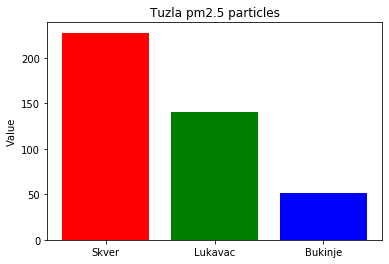

In [102]:
import matplotlib.pyplot as plt

plt.bar(df_pm25.location, df_pm25.value, align='center', color = list('rgbkymc'))
plt.ylabel("Value")
plt.title("Tuzla pm2.5 particles")

### Same result with two different techniques

In [106]:
dataset = df[df["pollutant"] == "pm25"]

In [113]:
dataset = dataset.sort_values(by = "value", ascending = False)

Text(0.5, 1.0, 'Tuzla pm2.5 particles')

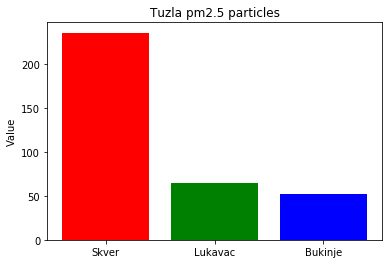

In [115]:
plt.bar(dataset.location, dataset.value, align = "center", color = list('rgbcmyk'))
plt.ylabel("Value")
plt.title("Tuzla pm2.5 particles")